## Haline forcing simulations

**Notebook by: Maria J. Molina (NCAR) and Nan Rosembloom (NCAR)**

600 years in length.

years 0-150 involve ramping up (factor of 0.0015)

years 150-450 are constant haline (factor of 0.0015)

years 451-600 involve ramping down (factor of 0.0015)

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('/glade/p/cgd/ccr/people/ahu/cesm1_hosing/hosingAMOCmip0.3Sv.nc')  # read in dummy file

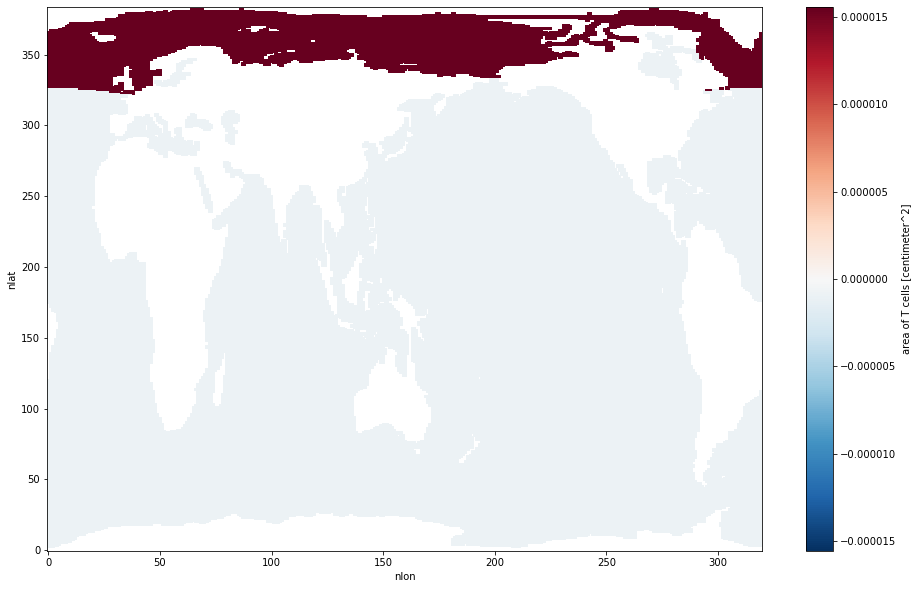

In [3]:
%matplotlib inline
ds['HOSING'].plot(figsize=(16,10))   # visualize dummy file

In [4]:
ds_haline = ds.expand_dims({'time':np.arange(0,600,1)}).copy(deep=True).transpose('time','nlat','nlon')  # add time dim and copy file

In [9]:
ds_haline['HOSING'].dims

('time', 'nlat', 'nlon')

In [10]:
print(ds_haline['HOSING'].max().values)  # original file's max
print(ds_haline['HOSING'].min().values)  # original file's min

1.5550840360229028e-05
-8.775814297735363e-07


### Create a mask for help in creating fill values for haline forcing

In [11]:
mask = xr.where(
        (ds_haline['HOSING'] == ds_haline['HOSING'].max()), 
         1, # 1 for places to change
         0, # 0 for places not to change
).isel(time=0).rename('mask')

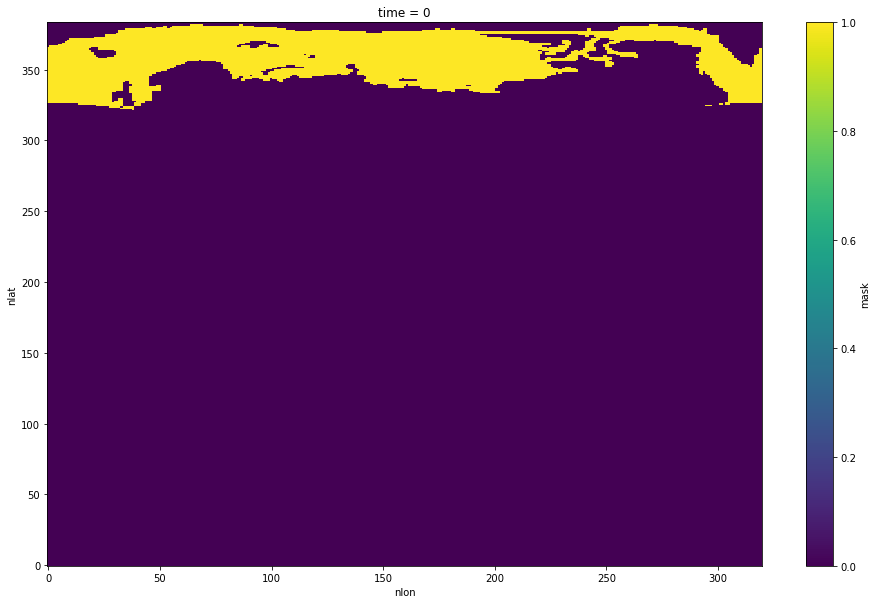

In [13]:
mask.plot(figsize=(16,10))   # visualize mask (1 is place to do haline forcing, 0 are areas to not force)

In [14]:
mask = mask.values   # convert to numpy array

In [15]:
# fill the haline forcing values over the 600 years using the scale factor (product of 0.0015)

for haline in range(600):
    
    if haline < 150:
        
        scale_factor = (haline + 1) * 0.0015
        
        ds_haline['HOSING'][haline,:,:] = (mask * scale_factor)
        
        #print(haline + 1, scale_factor)
        
    elif haline >= 150 and haline < 450:
        
        ds_haline['HOSING'][haline,:,:] = (mask * scale_factor)
        
        #print(haline + 1, scale_factor)
        
    elif haline >= 450:
        
        scale_factor = (600 - (haline + 1)) * 0.0015
        
        ds_haline['HOSING'][haline,:,:] = (mask * scale_factor)
        
        #print(haline + 1, scale_factor)

### Check the fill values

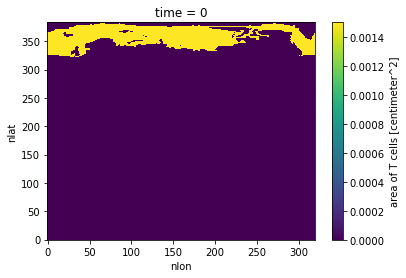

In [16]:
ds_haline['HOSING'].isel(time=0).plot()   # year 1 already has forcing (0.0015)

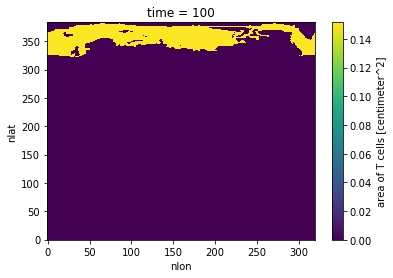

In [17]:
ds_haline['HOSING'].isel(time=100).plot()    # ramping up

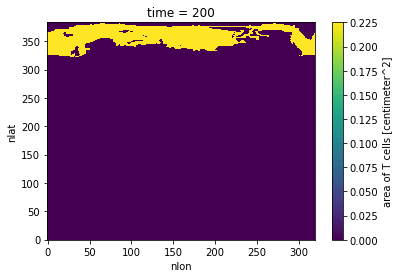

In [18]:
ds_haline['HOSING'].isel(time=200).plot()    # constant

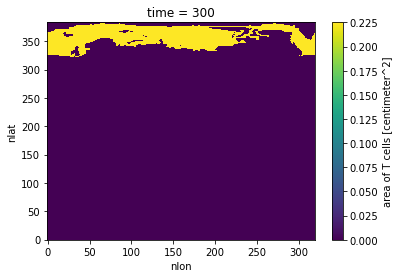

In [19]:
ds_haline['HOSING'].isel(time=300).plot()     # constant

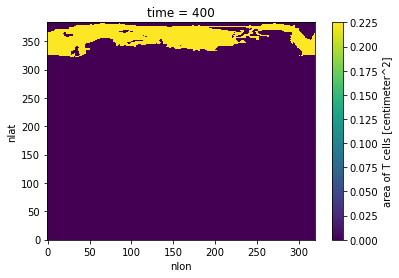

In [20]:
ds_haline['HOSING'].isel(time=400).plot()      # constant

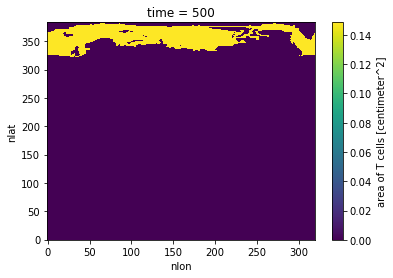

In [21]:
ds_haline['HOSING'].isel(time=500).plot() # ramp down

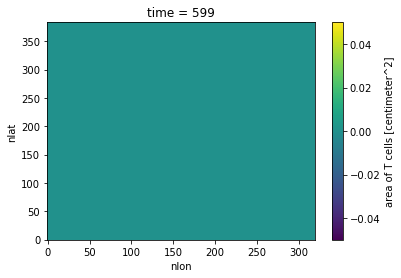

In [22]:
ds_haline['HOSING'].isel(time=599).plot()     # final year is zero everywhere

### Adding attributes

In [29]:
ds_haline.attrs['Authors'] = 'Nan and Maria'

In [30]:
ds_haline

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 600)
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 ... 592 593 594 595 596 597 598 599
Dimensions without coordinates: nlat, nlon
Data variables:
    HOSING   (time, nlat, nlon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    Authors:  Nan and Maria

### Saving file

In [31]:
#ds_haline.to_netcdf("test.nc")